Swiss Temperature Data
---

In this exercise we use [Swiss temperature data](https://www.meteoswiss.admin.ch/home/climate/swiss-climate-in-detail/Swiss-temperature-mean/Data-on-the-Swiss-temperature-mean.html) which describes the average temperature measured across various altitudes in Switzerland. The measurement has been available in monthly frequency since 1864 and is continuously updated with the most recent values. The objective is to explore the application of `period_range` with real data.


Create a date column with `period_range`  by going through the following steps:

1. Load the data from the file `c2_10.18751-Climate-Timeseries-CHTM-1.1-swiss.txt` in the Resource tab into a dataframe using the `time` column as the index. Check the shape and the data in order to answer the following __questions__. 

    - Are all years from 1864 to 2020 present in the data?
    - Are all months present in the data? 

__Remark__: If you open the txt file in a text editor or JupyterLab you can see that the actual table with the data is preceded by a few lines of meta data. The parameter `skiprows` in the `read_csv()` function might help.

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt 

df = pd.read_csv("c2_10.18751-Climate-Timeseries-CHTM-1.1-swiss.txt", skiprows=15, delimiter='\t')
df.set_index("time", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 1864 to 2020
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   jan     157 non-null    float64
 1   feb     157 non-null    float64
 2   mar     157 non-null    float64
 3   apr     157 non-null    float64
 4   may     157 non-null    float64
 5   jun     157 non-null    float64
 6   jul     157 non-null    float64
 7   aug     157 non-null    float64
 8   sep     156 non-null    float64
 9   oct     156 non-null    float64
 10  nov     156 non-null    float64
 11  dec     156 non-null    float64
 12  djf     156 non-null    float64
 13  mam     157 non-null    float64
 14  jja     157 non-null    float64
 15  son     156 non-null    float64
 16  winter  156 non-null    float64
 17  summer  156 non-null    float64
 18  year    156 non-null    float64
dtypes: float64(19)
memory usage: 24.5 KB


__Answers__:
- < enter here >
- < enter here >

2. Select all the columns containing monthly data.

In [3]:
monthly_df = df[["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]]

3. We would like to build a new __dataframe__ with new __index__ and __columns__ 'Year', 'Month' and 'Temp', where each row represents a month:
    - use `stack()` to create the new dataframe (see the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html)  and examples therein). `stack()`  is a useful function for recreating dataframes and integrates the columns as part of the index. In fact, we get a multiIndex dataframe with the year as level=0 and the month as level=1.
    - reset the index of the new dataframe.
    - finally, give new names to the columns of the dataframe (see [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) for how to change the name of columns).
    <br>You can do these three steps together in a single line or separately.

In [4]:
monthly_stack = monthly_df.stack()
temp = monthly_stack.reset_index()
temp.rename(columns={'time': 'year', 'level_1': 'month', 0: 'temperature'}, inplace=True)

Let's check the head of the final dataframe:

In [5]:
temp.head()

,year,month,temperature
0,1864,jan,-7.10
1,1864,feb,-4.52
2,1864,mar,0.04
3,1864,apr,2.11
4,1864,may,7.43


4.  Create a date column `df['Date']` using `period_range`. Note that `period_range` requires setting several parameters. In particular, of the three parameters `start`, `end`, and `periods` exactly two must be specified. Finally, you need to specify the frequency parameter `freq`. Your data are in monthly frequency and you can find the appropriate frequency strings from [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).
<br>You should set the `start` to be the first month e.g. '1864-jan'. You can ignore the end but then you have to specify the number of `periods`, here total number of months.

In [6]:
temp["date"]= pd.period_range(start='1864-jan', periods=len(temp), freq='M')
temp.head()

,year,month,temperature,date
0,1864,jan,-7.10,1864-01
1,1864,feb,-4.52,1864-02
2,1864,mar,0.04,1864-03
3,1864,apr,2.11,1864-04
4,1864,may,7.43,1864-05


5. Set the `Date` column as your new index.

In [7]:
temp.set_index('date', inplace=True)
temp.head()

,year,month,temperature
date,,,
1864-01,1864,jan,-7.10
1864-02,1864,feb,-4.52
1864-03,1864,mar,0.04
1864-04,1864,apr,2.11
1864-05,1864,may,7.43


6. Finally plot the monthly temperatures. You should get the following plot:

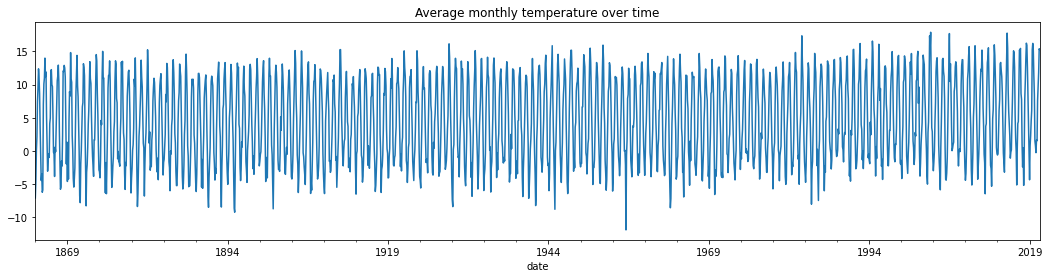

In [8]:
temp.temperature.plot(figsize=(18, 4))
plt.title("Average monthly temperature over time")
plt.show()

__Question__: What can you observe in this plot? What is hard to observe from the current plot?

__Answer__: 
< enter here >

You might have noticed that the plot with monthly temperature is not very informative to see the trend of the temperature over the last two centuries. It will be easier to look at the average annual temperature.

7. Use `groupby()` to calculate the average annual temperatures and plot them over time.

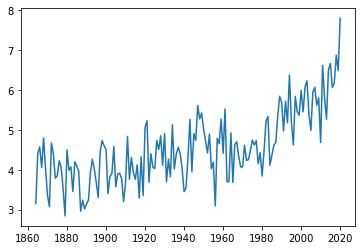

In [14]:
df = temp

plt.plot(df.groupby('year').mean())
plt.show()

__Questions__: 
- If you consider the average annual temperature decade by decade, what do you observe?
- What do you observe if you compare the data of the first 100 years with the data of the last 50 years?

__Answers__: 
- < enter here >
- < enter here >

8. Use `resample()` to calculate the average annual temperatures and plot them over time.

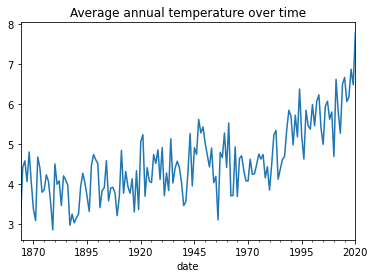

In [17]:
df['temperature'].resample("A").mean().plot()
plt.title("Average annual temperature over time")
plt.show()

__Question__: Do you get the same plot as in the previous case by `groupby()`?

__Answers__: Yes, with get the same plot using both `groupby()` and `resample()`. The `resample()` function has the advantage that we can aggregate the values in other frequencies such as month and quarter.

9. Use `rolling()` to calculate the average temperatures over a decade and plot them over time.

[]

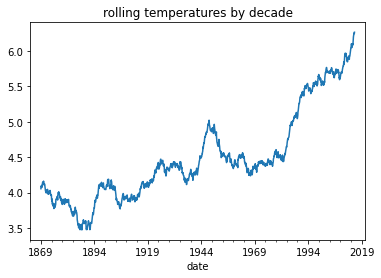

In [19]:
df['temperature'].rolling(120, center=True).mean().plot()
plt.title("rolling temperatures by decade")
plt.plot()

__Question__: Do you observe an upward trend in the temperatures?

__Answers__: yes

****
__The case of missing values in the data__: 
Note that we could use  `period_range` easily as described above because we already knew that there is no missing month in the data. However, in case a month is missing the entire row will be dropped out when we stack the data which makes our final column `Date` misaligned (try this by deleting a value from the original data set and go through the steps and see the difference). There are two solutions (see below) when we know that there might be missing values in the data set:

- In step 3, set `dropna=False` when you stack the data `data_m.stack(dropna=False)`, and follow the next steps. By this we tell the stack function to keep the column with the missing value and let it to appear as a row with `NaN` value.
- In step 4, instead of using `period_range` to create dates, define a date column by using `df['Date']  = df['Year'].astype('str')+'-'+df['Month']`, and follow the next steps. 

In the first solution, the temporal order of the data remains in place and missing values appear as `NaN`s in front of their corresponding dates and you can see the gaps in the plot. However, in the second solution the chronological order of data will change in the sense that the months with missing temperature will not appear in the data and the plot.